In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

In [3]:
# 2. Load Data
df = pd.read_csv("C:/Users/dilli/Downloads/kidney_disease.csv")

In [4]:
# 3. Drop ID column (not useful for prediction)
if 'id' in df.columns:
    df = df.drop('id', axis=1)

In [5]:
# 4. Standardize column names (optional, but helps avoid typos)
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

In [6]:
# 5. Replace problematic values and unify target column
df.replace('?', np.nan, inplace=True)
if 'classification' in df.columns:
    df.rename(columns={'classification': 'class'}, inplace=True)

In [7]:
# 6. Convert appropriate columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

C:\Users\dilli\AppData\Local\Temp\ipykernel_19324\1739449652.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [8]:
# 7. Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'class' in cat_cols:
    cat_cols.remove('class')

In [10]:
# 8. Handle missing values
# Numerical: fill with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
# Categorical: fill with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\dilli\AppData\Local\Temp\ipykernel_19324\2791810046.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\dilli\AppData\Local\Temp\ipykernel_19324\2791810046.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [11]:
# 9. Encode categorical features
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [12]:
# 10. Encode target variable
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0, 'ckd\t': 1, 'no': 0, 'yes': 1}).astype(int)

In [13]:
# 11. Split features and target
X = df.drop('class', axis=1)
y = df['class']

In [14]:
# 12. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# 13. Feature Scaling (important for KNN, Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Random Forest Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[30  0]
 [ 0 50]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Logistic Regression Results:
Accuracy: 0.9875
Precision: 1.0
Recall: 0.98
F1 Score: 0.98989898989899
Confusion Matrix:
 [[30  0]
 [ 1 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80


Decision Tree Results:
Accuracy: 0.975
P

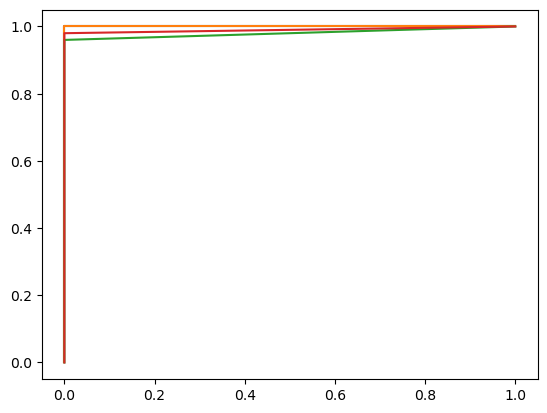

In [16]:
# 14. Model Training and Evaluation
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)

    # ROC Curve
    if y_prob is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        results[name] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'auc': roc_auc}
    else:
        results[name] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

C:\Users\dilli\AppData\Local\Temp\ipykernel_19324\502930066.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


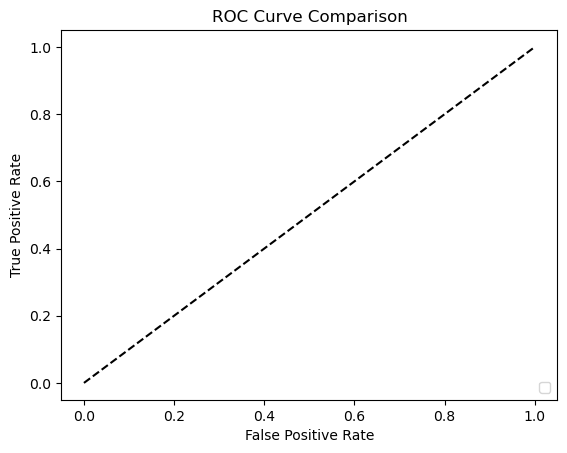

In [17]:
# 15. Plot ROC Curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [18]:
# 16. Display summary
print("\nSummary of Model Performance:")
for name, metrics in results.items():
    print(f"{name}: {metrics}")


Summary of Model Performance:
Random Forest: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'auc': 1.0}
Logistic Regression: {'accuracy': 0.9875, 'precision': 1.0, 'recall': 0.98, 'f1': 0.98989898989899, 'auc': 1.0}
Decision Tree: {'accuracy': 0.975, 'precision': 1.0, 'recall': 0.96, 'f1': 0.9795918367346939, 'auc': 0.98}
KNN: {'accuracy': 0.9625, 'precision': 1.0, 'recall': 0.94, 'f1': 0.9690721649484536, 'auc': 0.99}


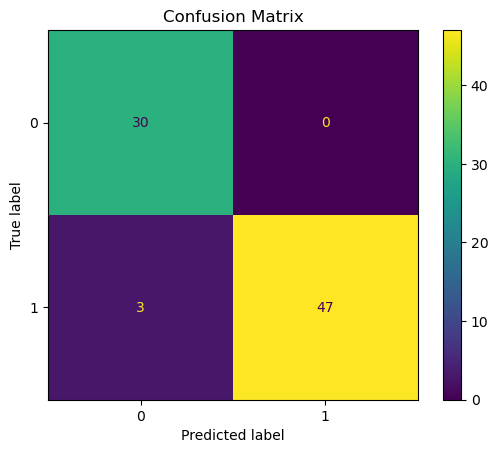

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")  # Saves the image
plt.show()

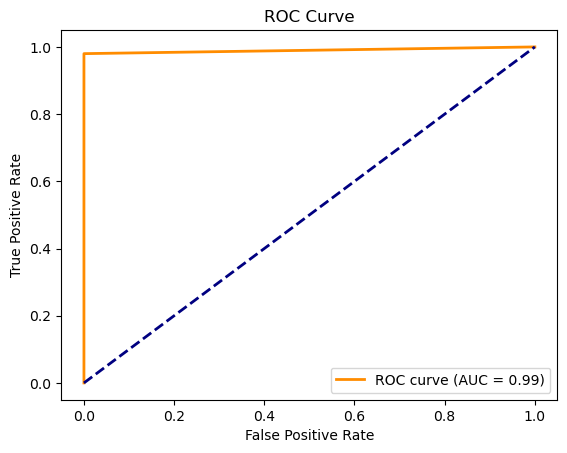

In [20]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("roc_curve.png")  # Saves the image
plt.show()